In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os


In [2]:
dfs = pd.read_csv("/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/stations.csv", delimiter=';')

#print(dfs.tail())

In [3]:
# assume you have a DataFrame object called "stations_df" with the data already loaded
station_names = dfs['nameStation'].tolist()

# print the list of station names
print(len(station_names))

114


In [4]:
dfa = pd.read_csv("/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/predictionDataSE.csv", delimiter=';')

print(dfa.head())

   idAvailability     lastUpdate  availableBikeStands  availableBikes status  \
0               1  1677146149000                   29               1   OPEN   
1               2  1677145763000                   11               9   OPEN   
2               3  1677145884000                   12              20   OPEN   
3               4  1677146069000                   27               8   OPEN   
4               5  1677145641000                    7              23   OPEN   

   nameStation  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [5]:
# Update the nameStation column with the station names cyclically
def nameupdate():
    num_stations = len(station_names)
    num_rows = len(dfa)
    indices = np.arange(num_rows) % num_stations
    dfa["nameStation"] = [station_names[i] for i in indices]


nameupdate()

print(dfa.head())

   idAvailability     lastUpdate  availableBikeStands  availableBikes status  \
0               1  1677146149000                   29               1   OPEN   
1               2  1677145763000                   11               9   OPEN   
2               3  1677145884000                   12              20   OPEN   
3               4  1677146069000                   27               8   OPEN   
4               5  1677145641000                    7              23   OPEN   

            nameStation  
0      SMITHFIELD NORTH  
1  PARNELL SQUARE NORTH  
2        CLONMEL STREET  
3         AVONDALE ROAD  
4     JAMES STREET EAST  


In [6]:
# Save the updated DataFrame to a new CSV file
dfa.to_csv("/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/updatedpredictionDataSE.csv", index=False, sep=";")

In [7]:
dfu = pd.read_csv("/Users/anita/Documents/SpringSemester/SoftwareEngineering/dataprediction/updatedpredictionDataSE.csv", delimiter=';', parse_dates=['lastUpdate'])

print(dfu.tail())


       idAvailability     lastUpdate  availableBikeStands  availableBikes  \
71724           71725  1678239055000                   25              15   
71725           71726  1678239022000                    1              29   
71726           71727  1678239049000                   38               2   
71727           71728  1678239049000                   19              11   
71728           71729  1678239049000                   25              13   

      status                        nameStation  
71724   OPEN                      RATHDOWN ROAD  
71725   OPEN  NORTH CIRCULAR ROAD (O'CONNELL'S)  
71726   OPEN                       HANOVER QUAY  
71727   OPEN                 OLIVER BOND STREET  
71728   OPEN            COLLINS BARRACKS MUSEUM  


In [8]:
# extract the hour from the lastUpdate column and create a new column
dfu['lastUpdate'] = pd.to_datetime(dfu['lastUpdate'], unit='ms')
dfu['hour'] = dfu['lastUpdate'].dt.hour

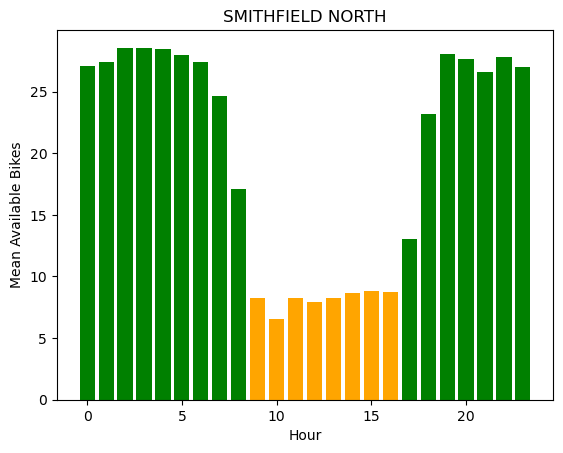

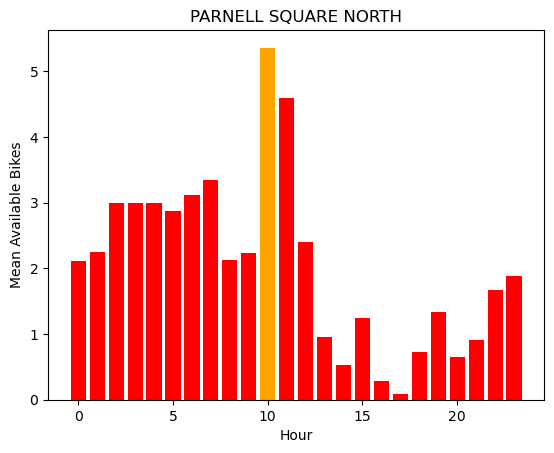

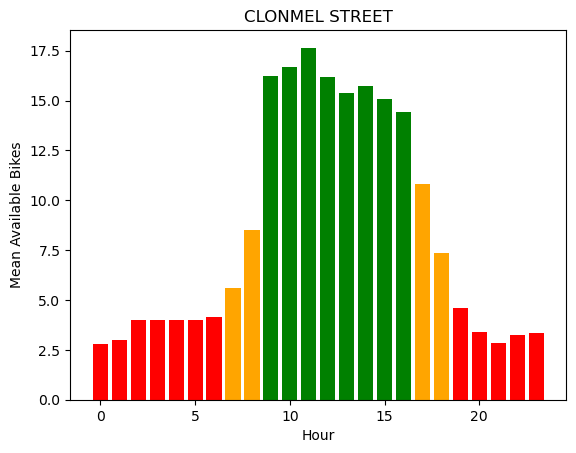

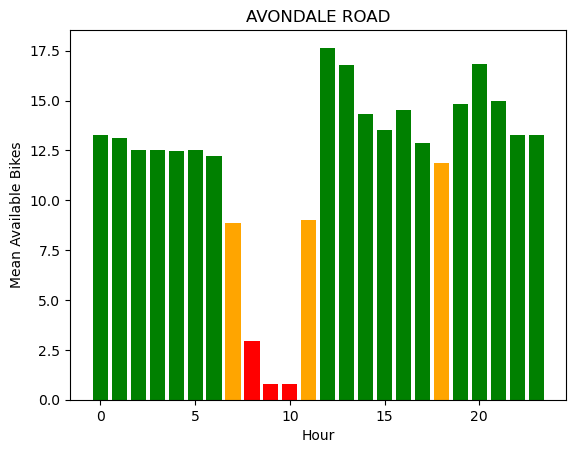

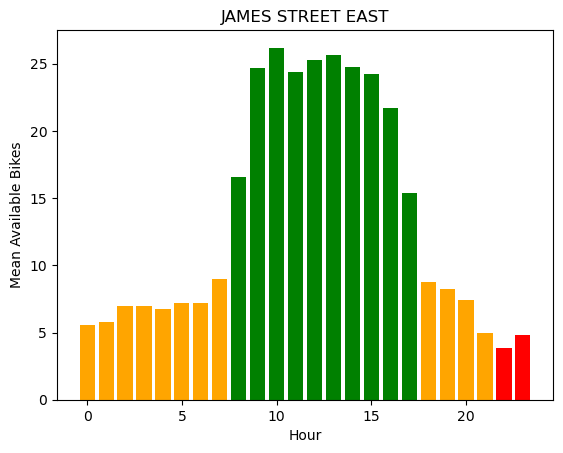

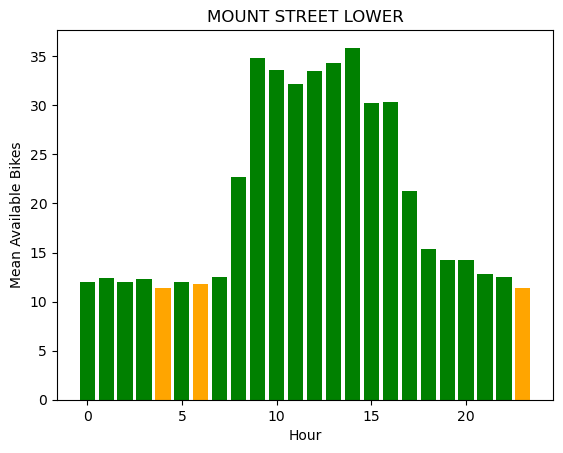

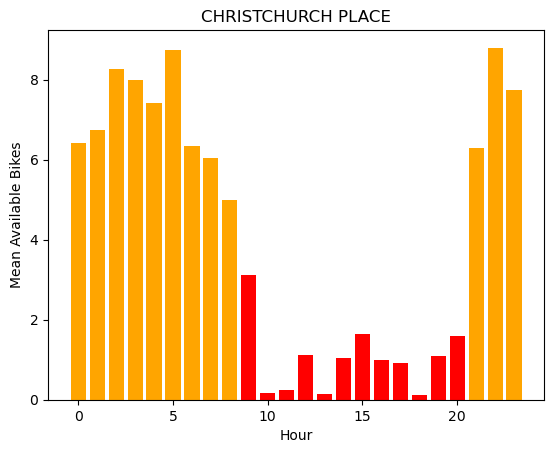

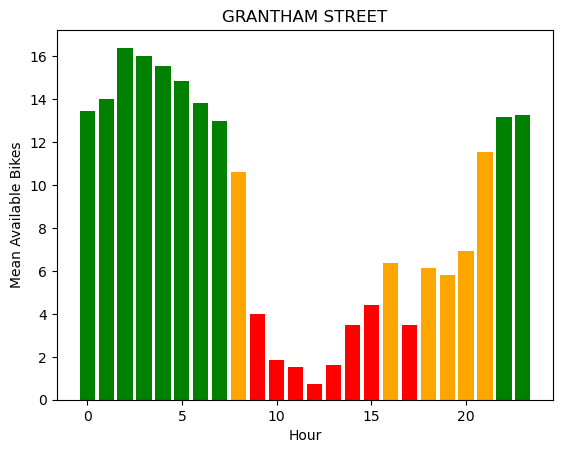

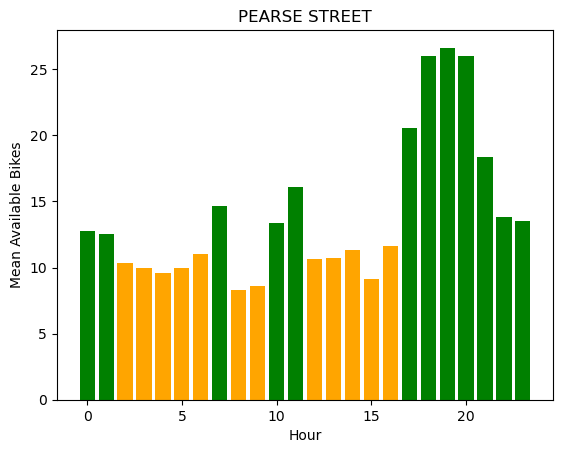

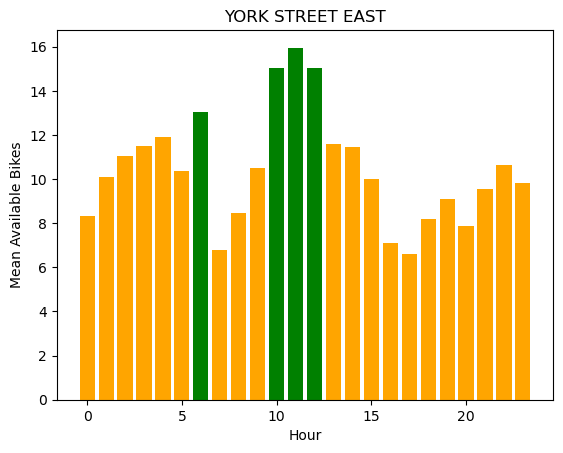

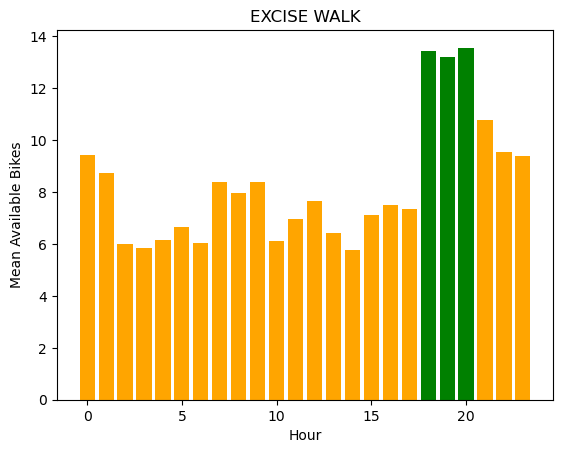

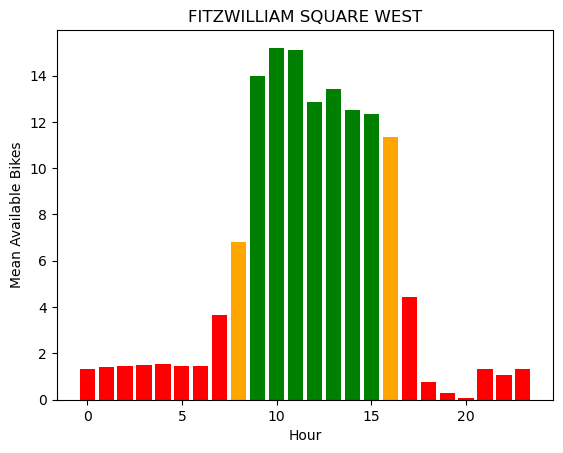

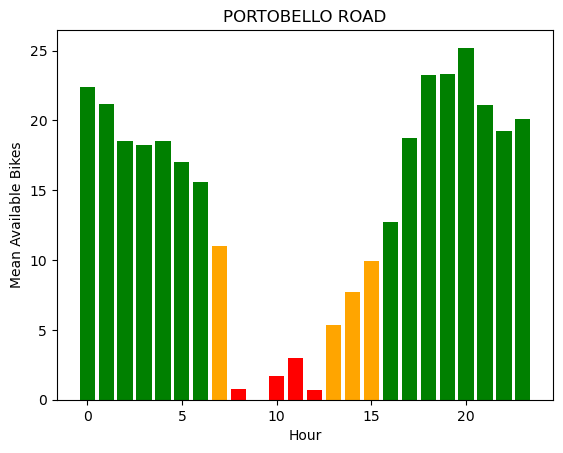

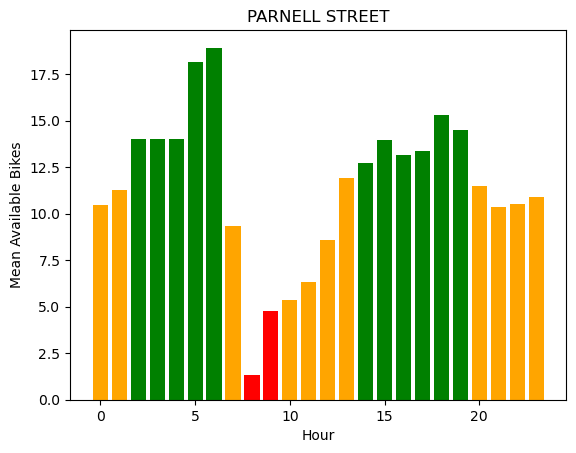

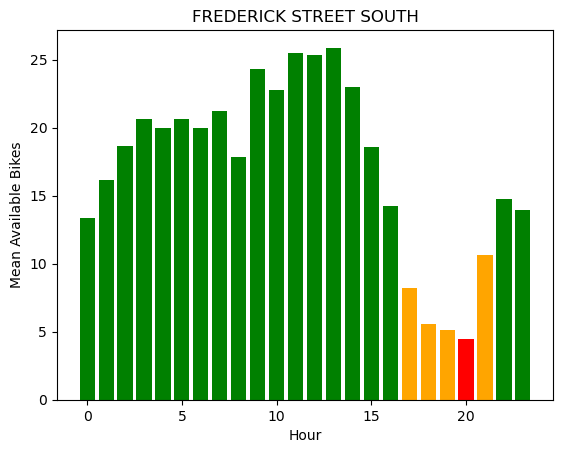

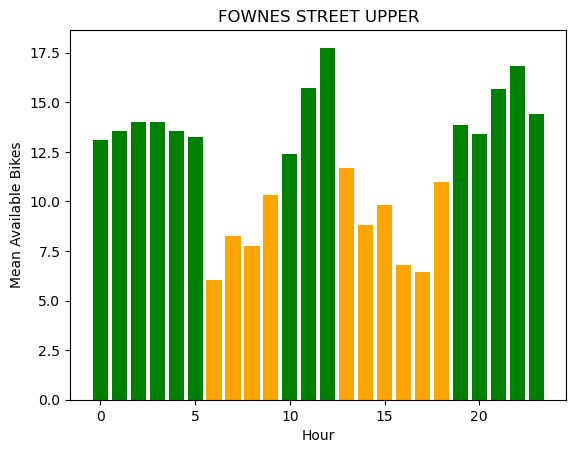

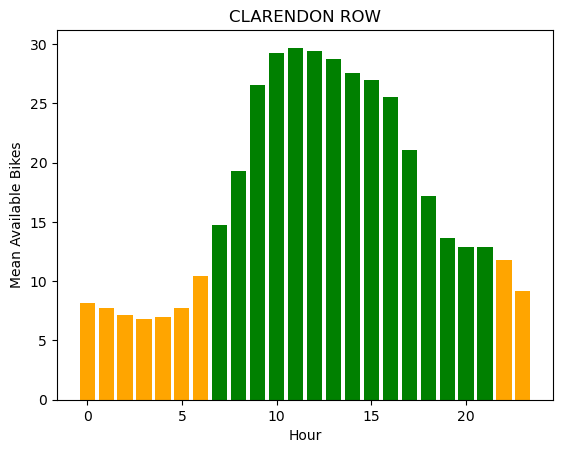

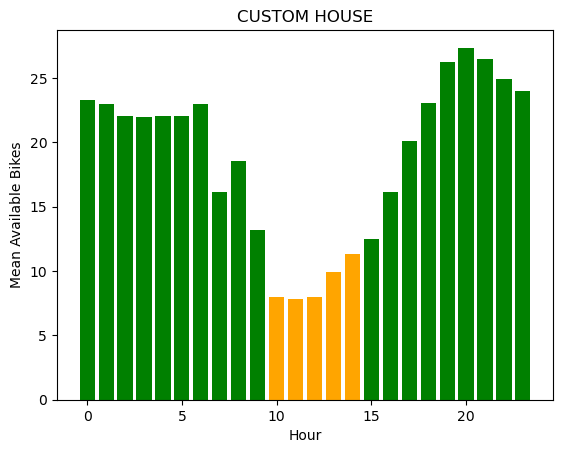

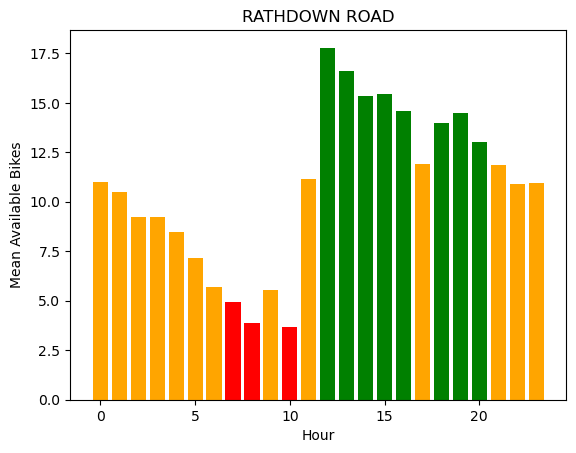

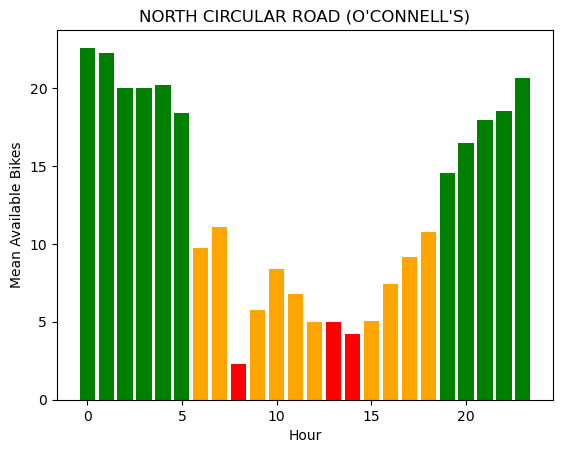

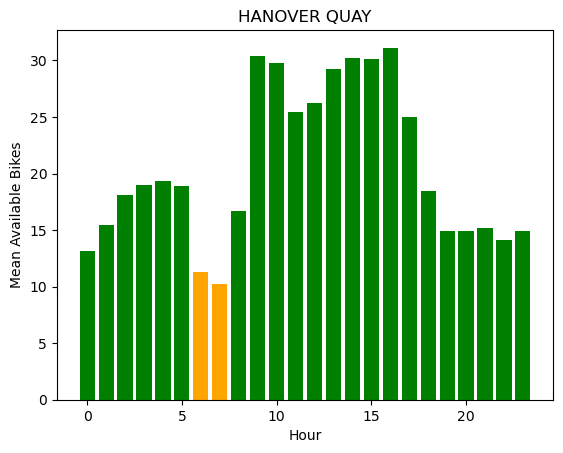

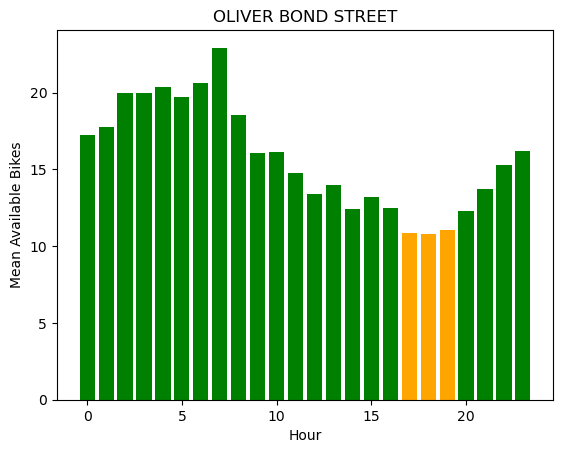

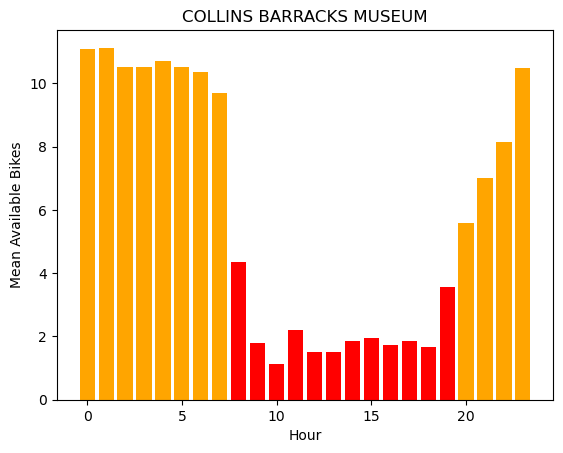

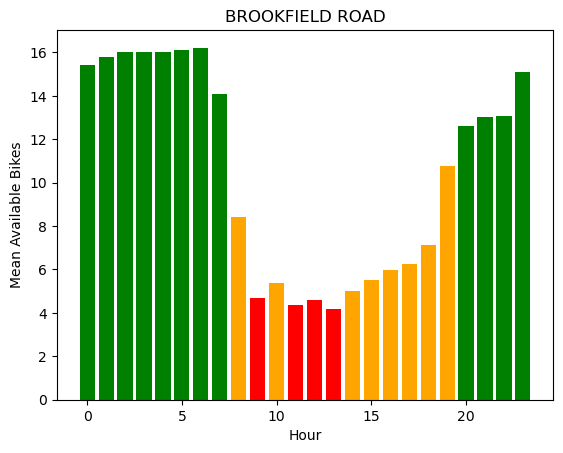

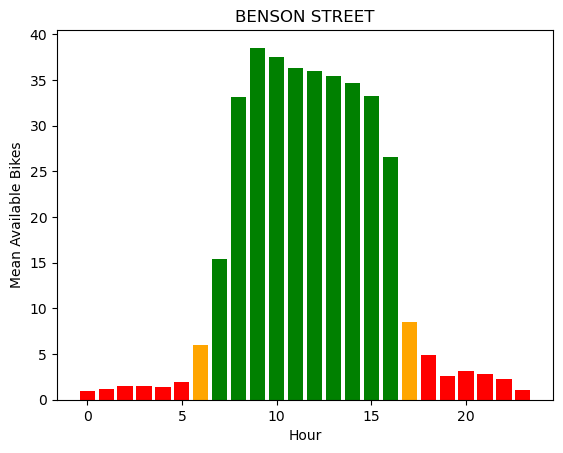

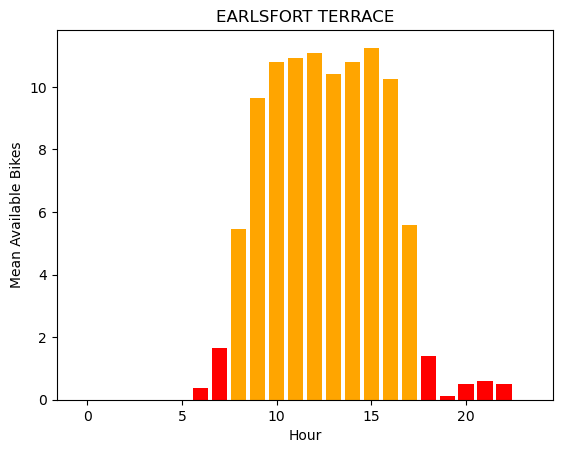

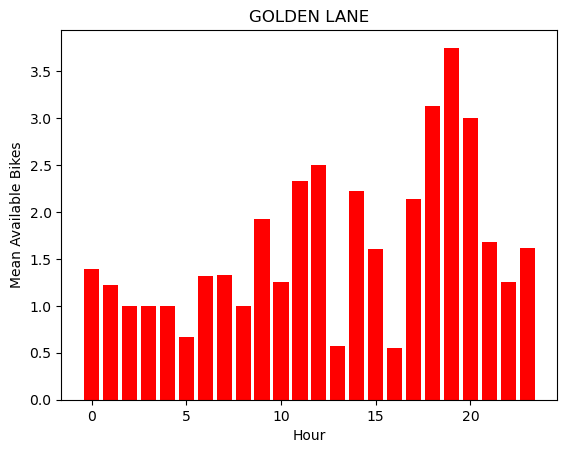

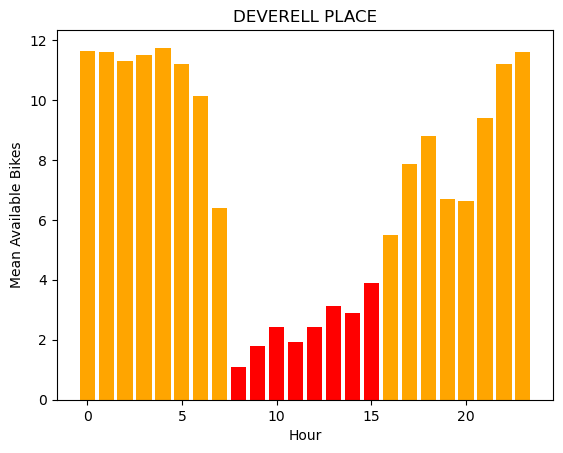

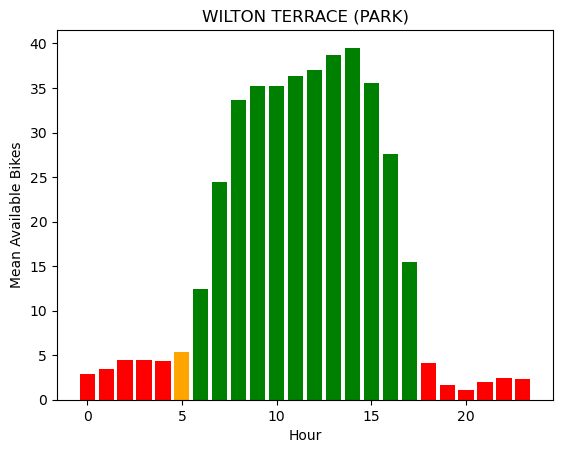

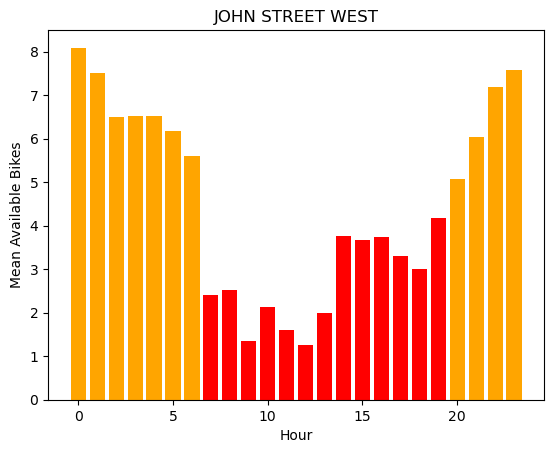

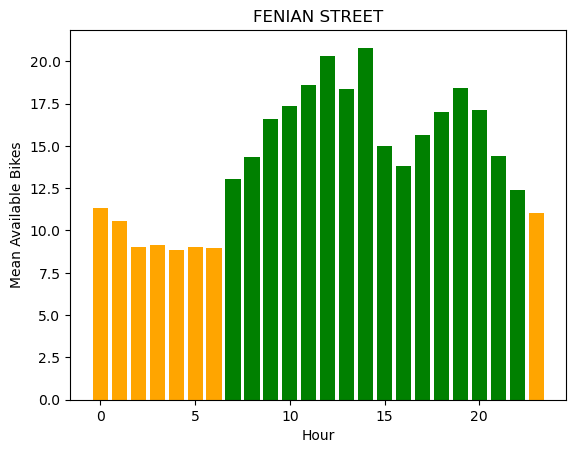

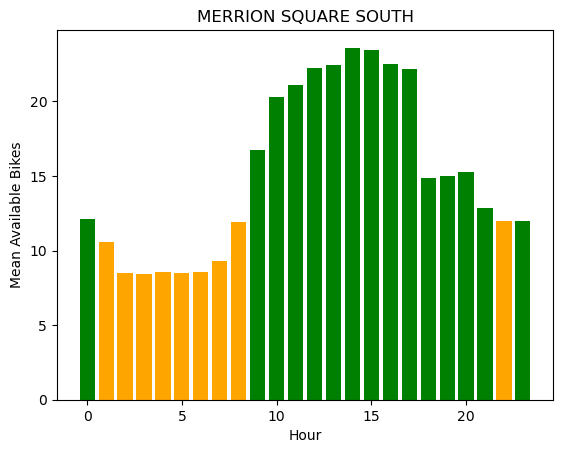

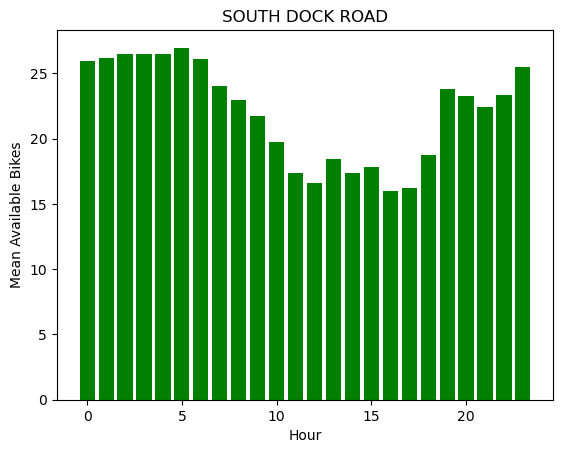

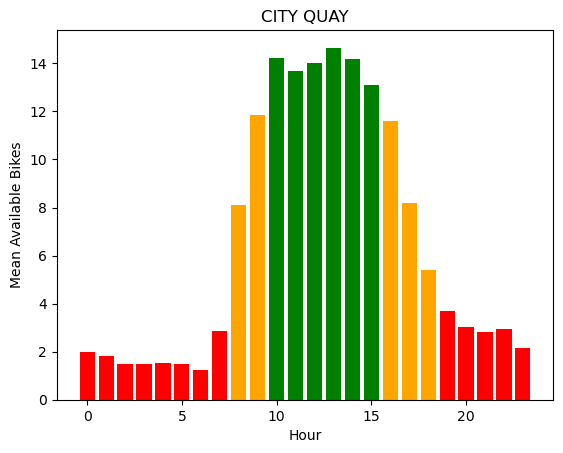

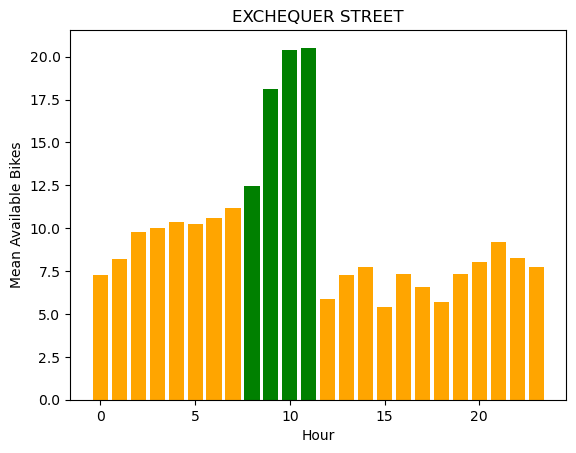

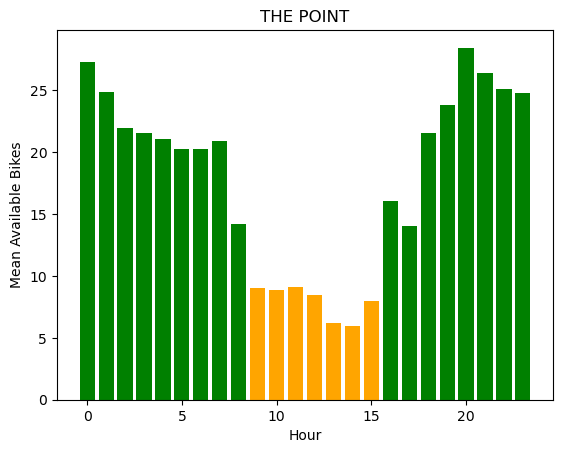

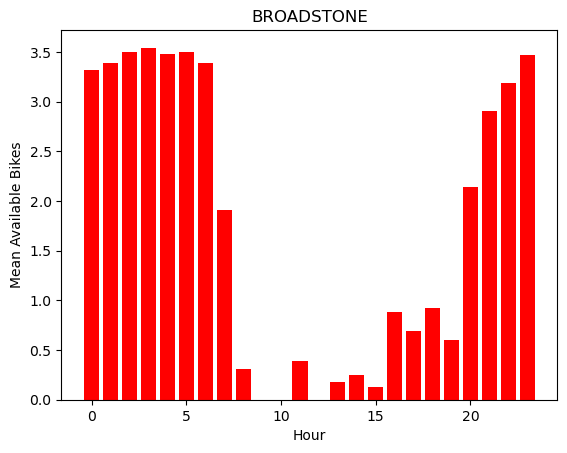

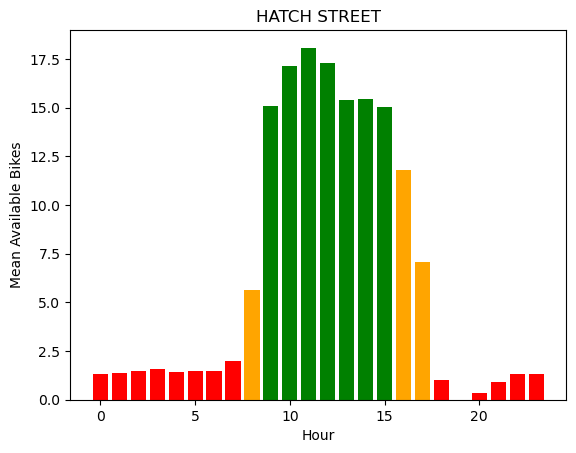

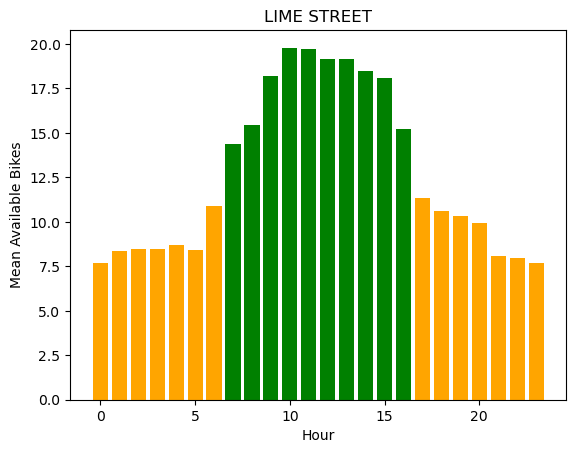

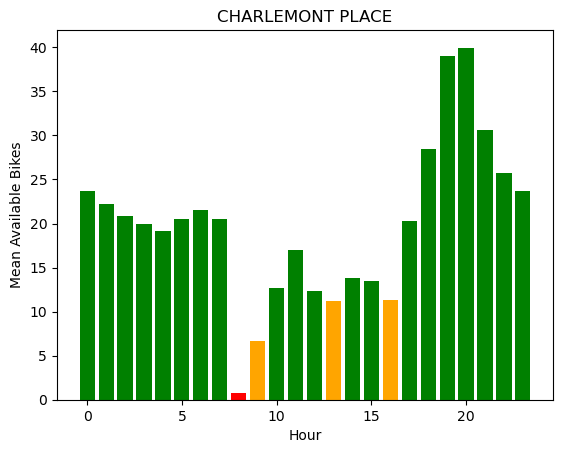

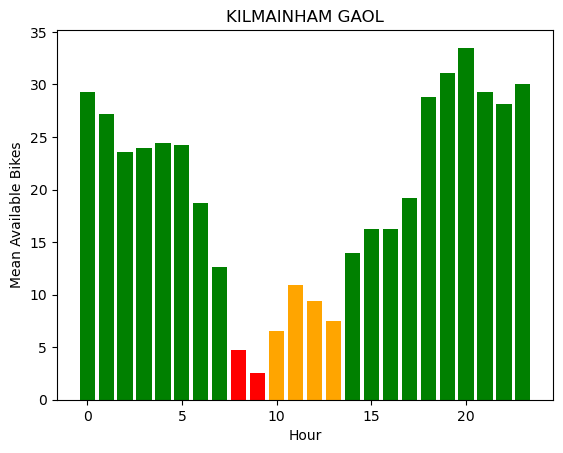

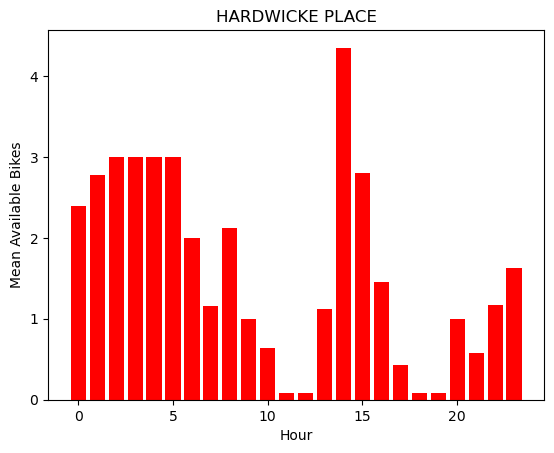

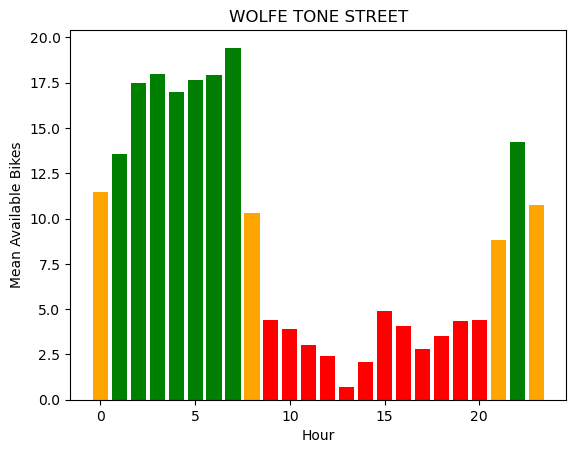

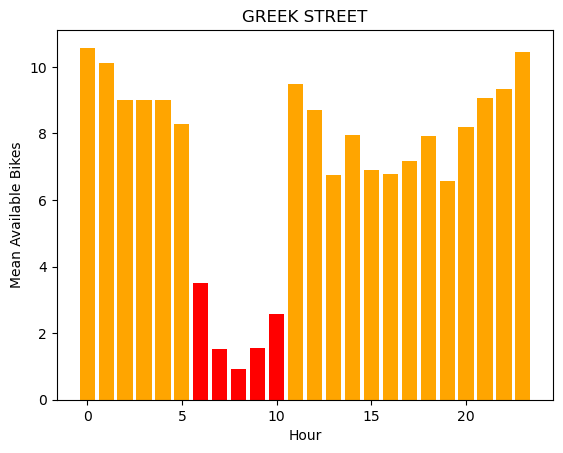

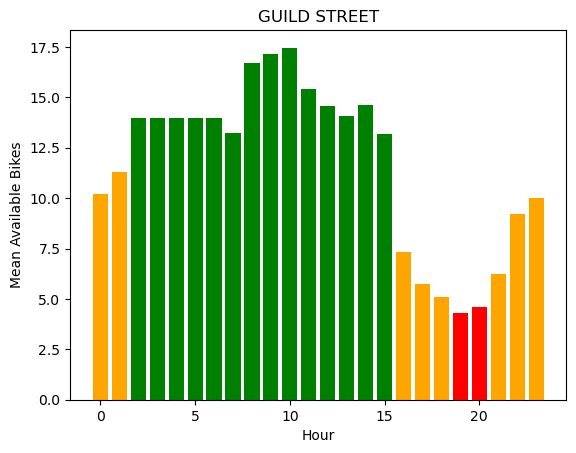

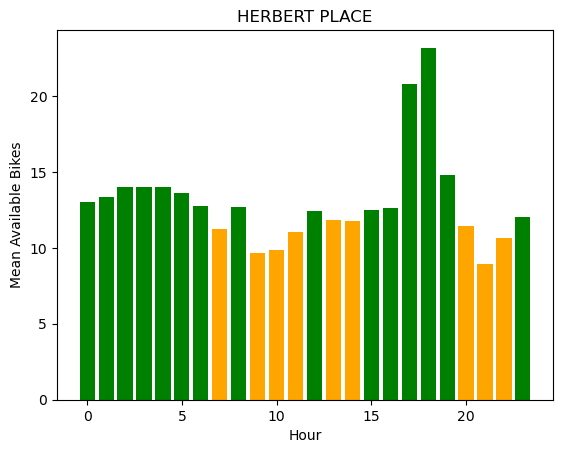

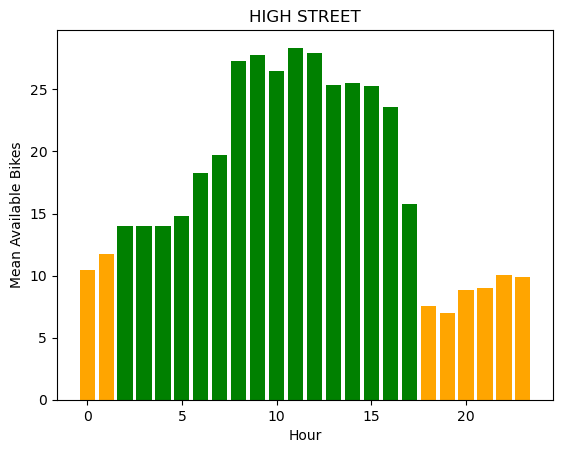

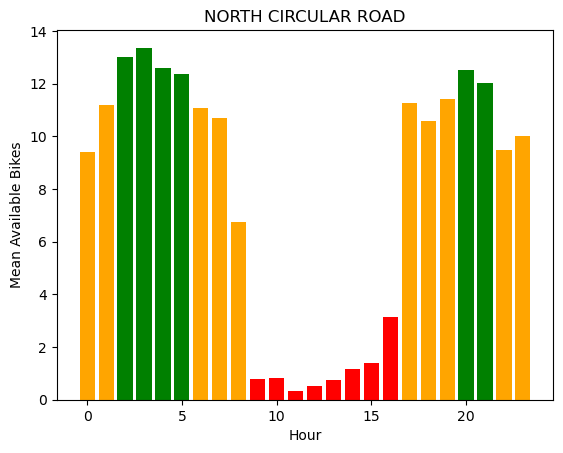

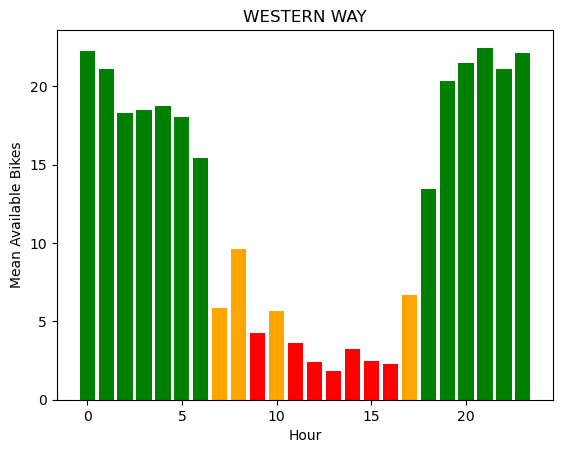

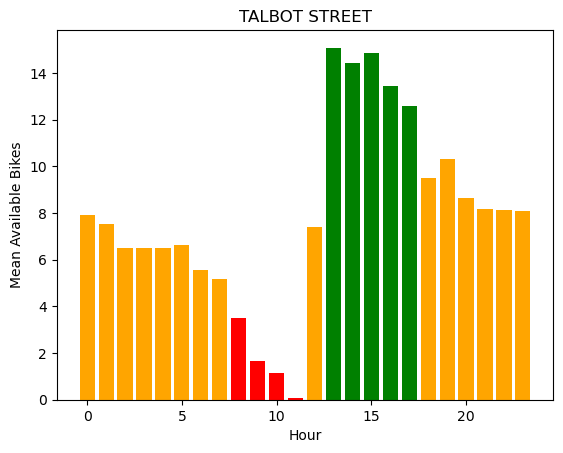

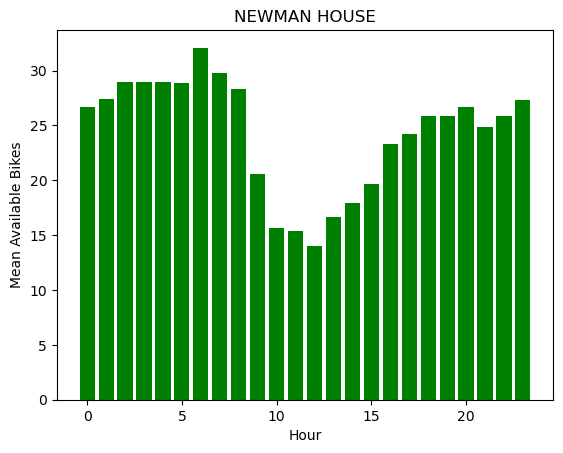

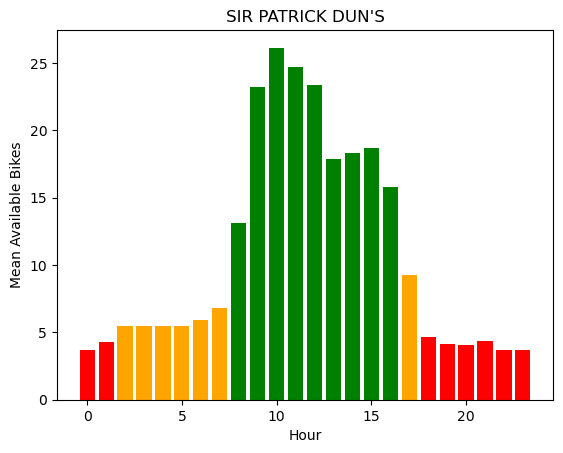

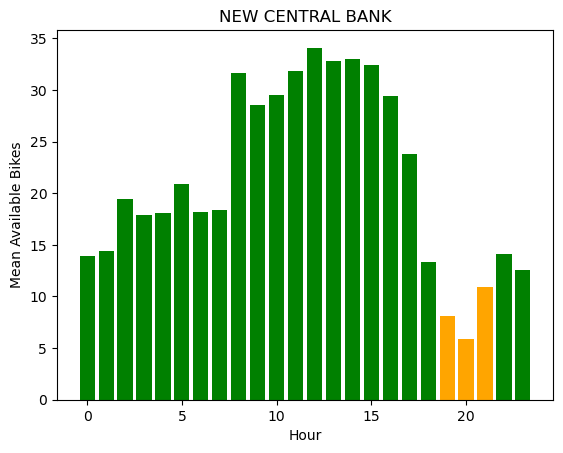

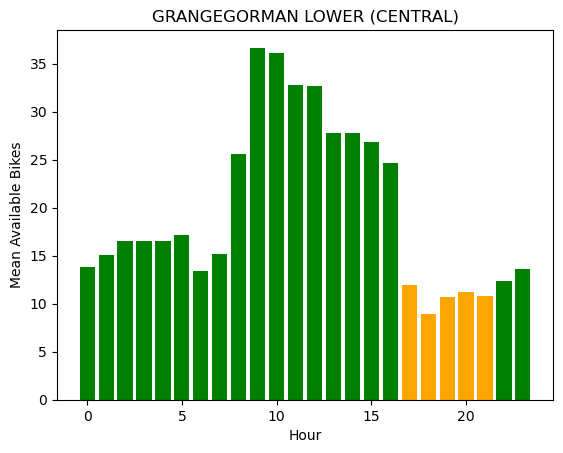

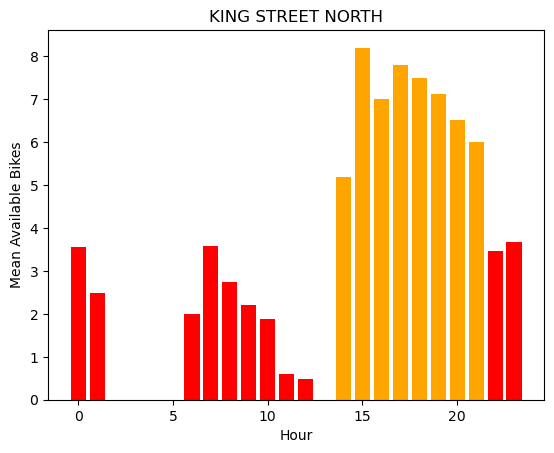

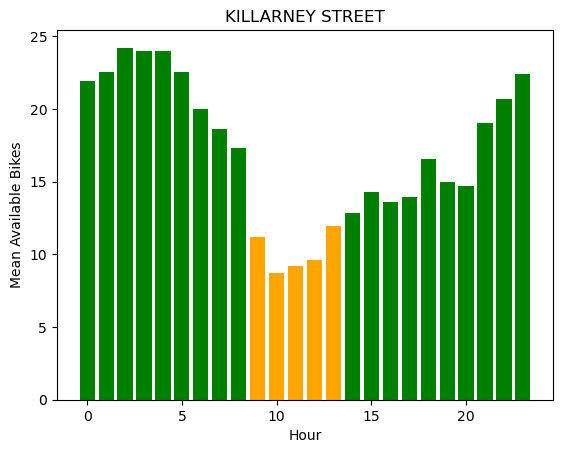

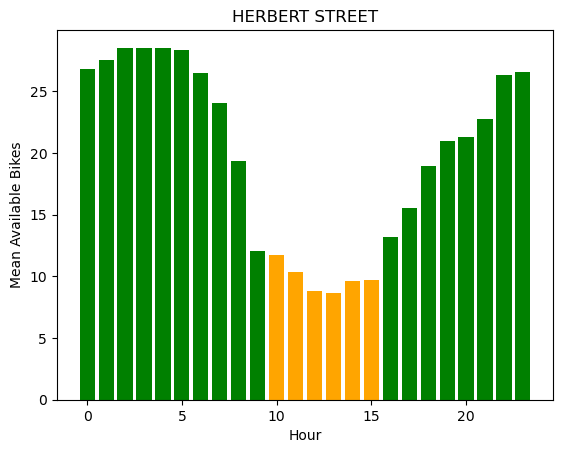

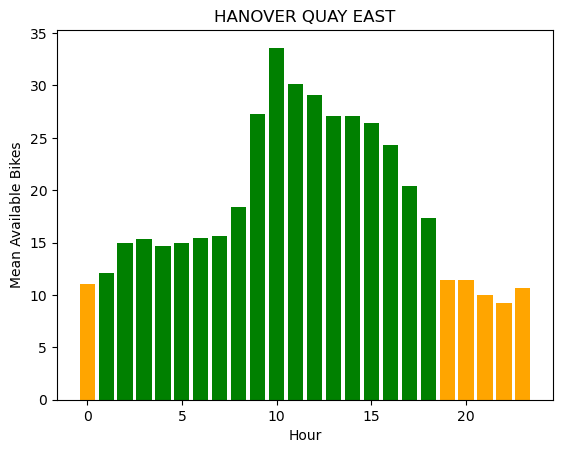

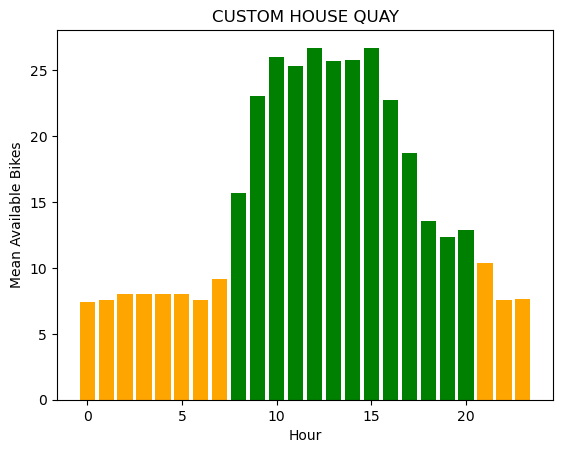

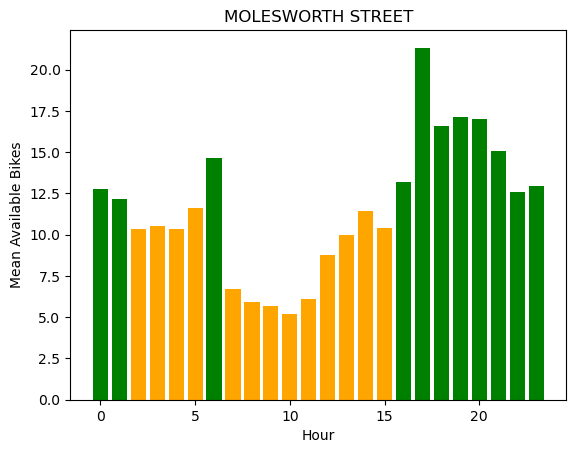

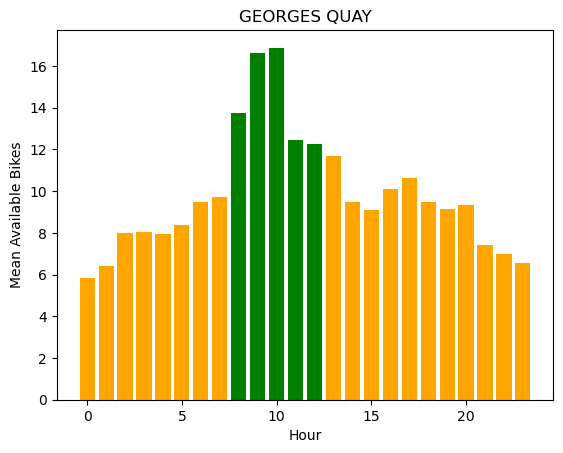

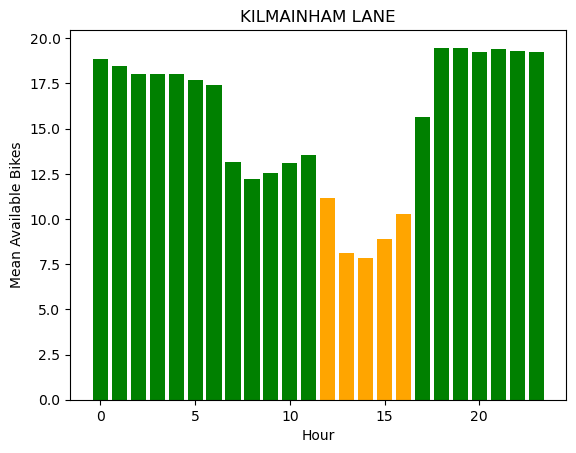

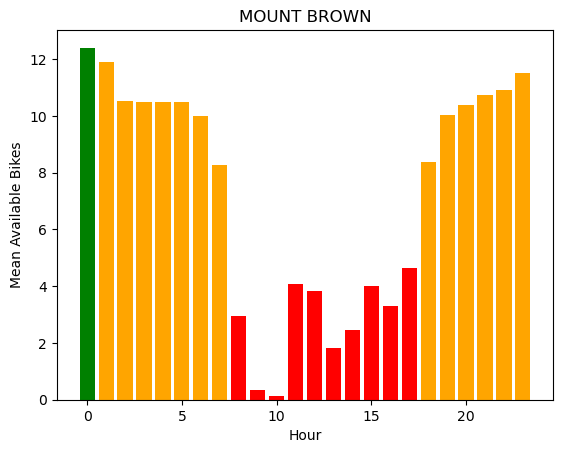

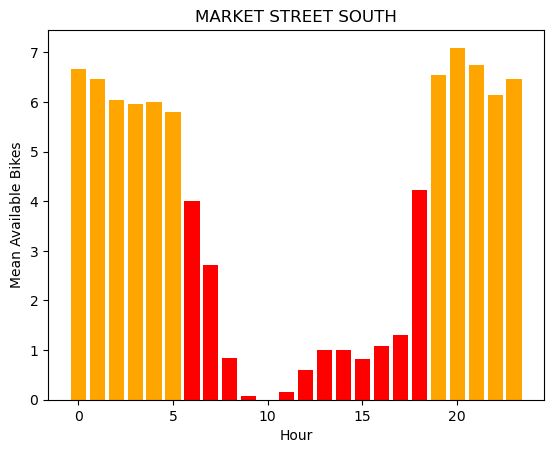

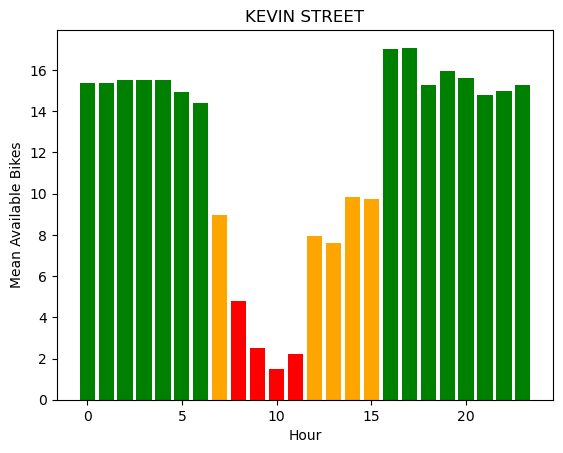

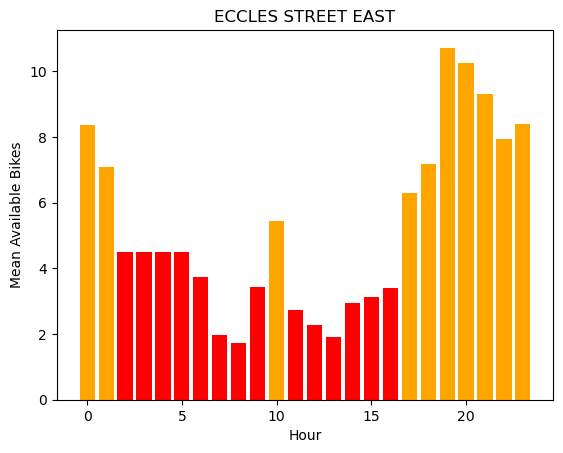

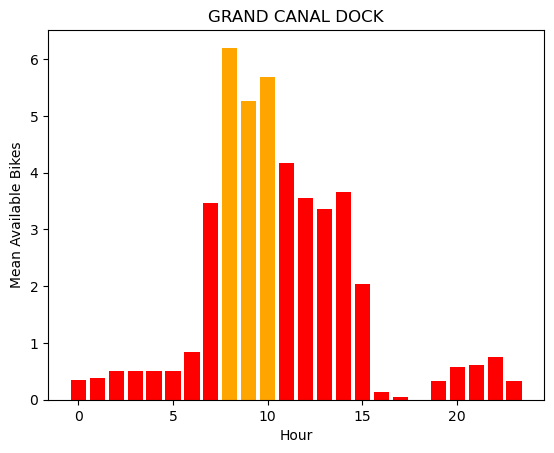

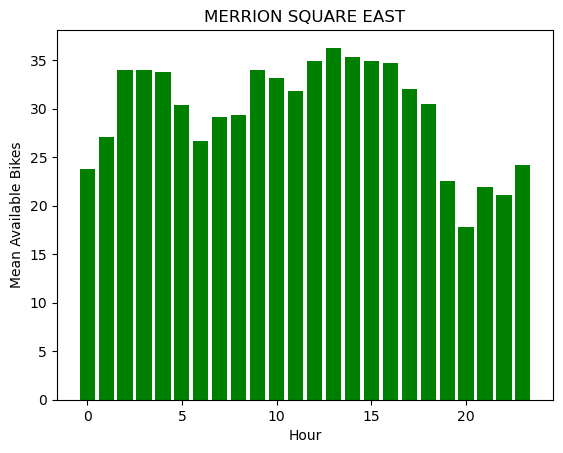

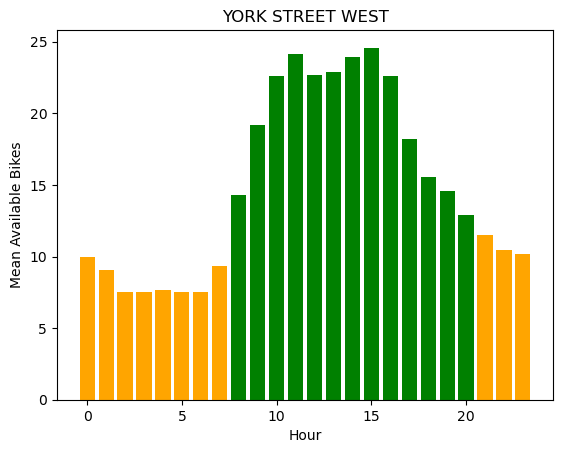

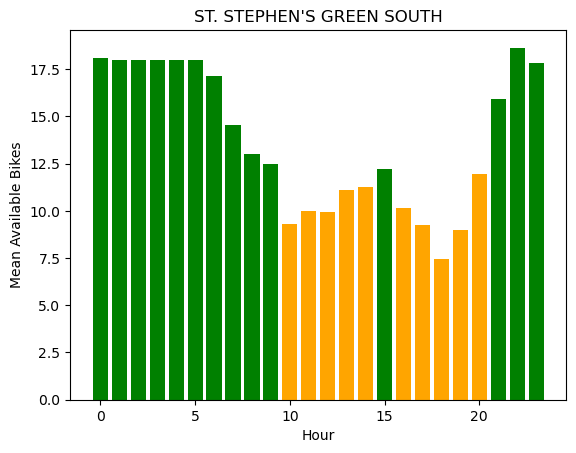

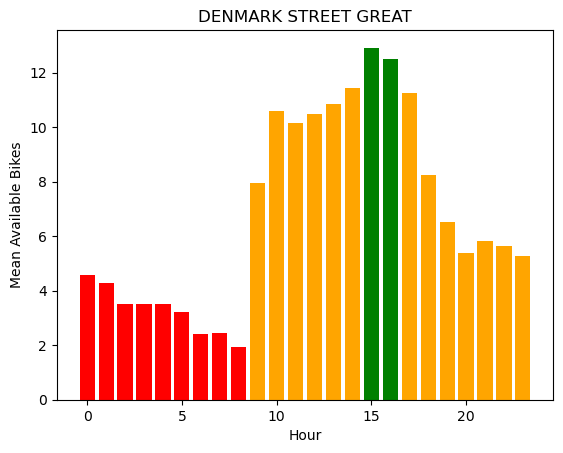

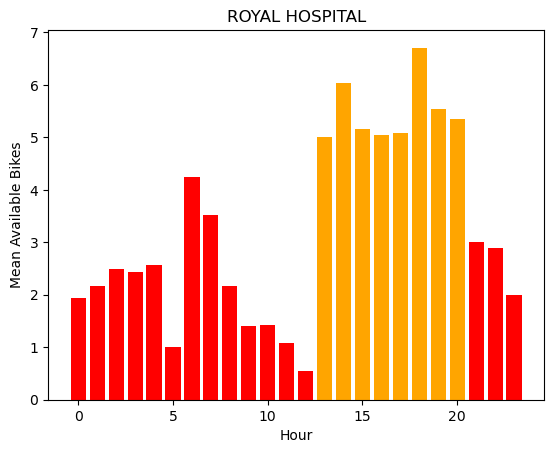

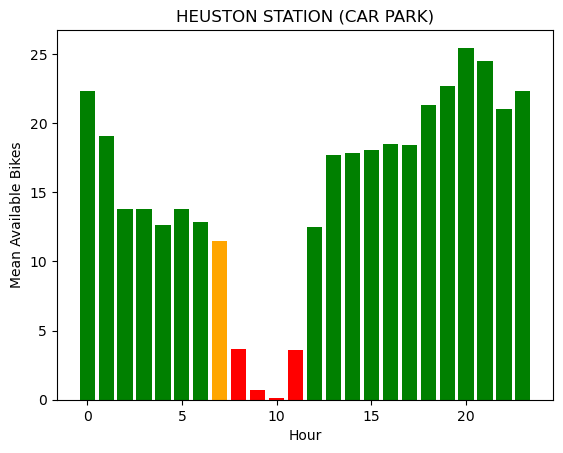

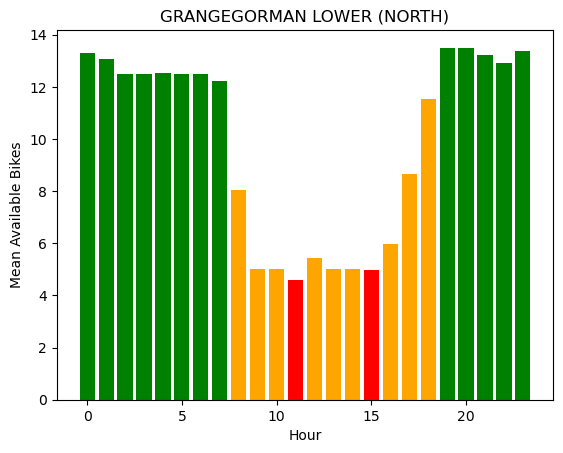

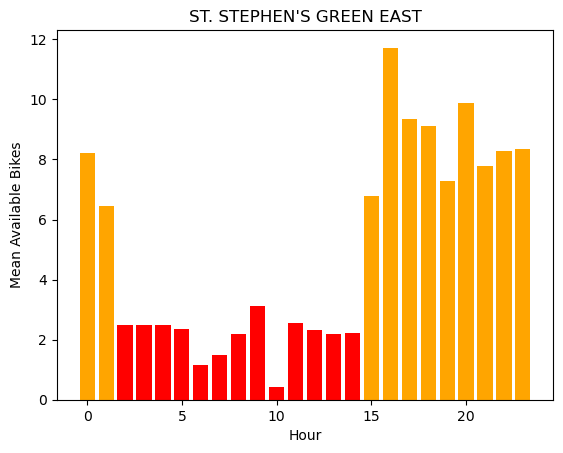

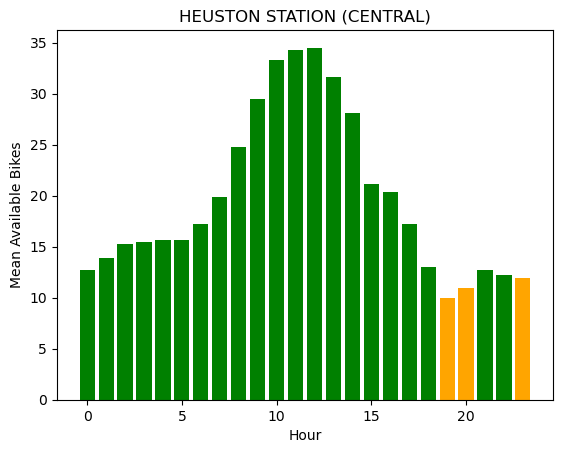

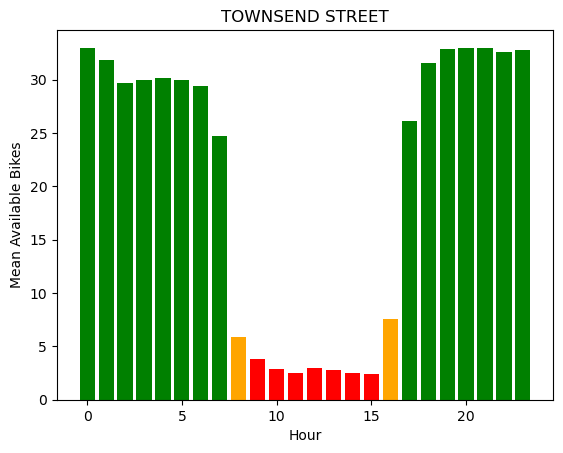

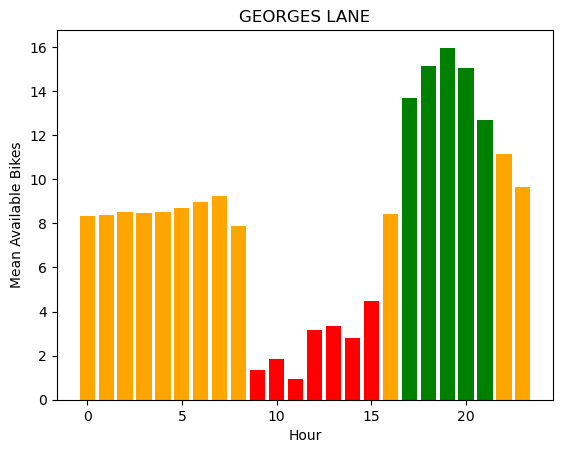

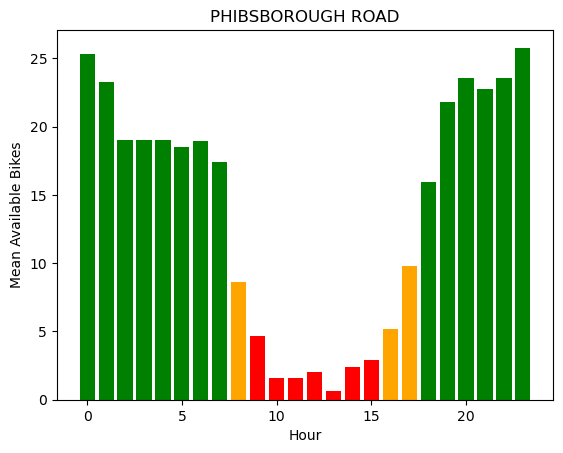

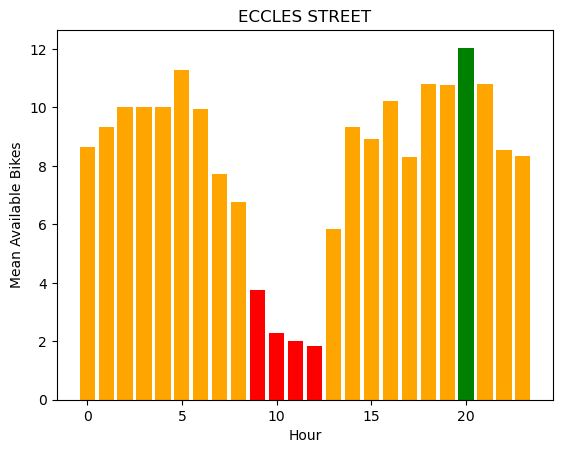

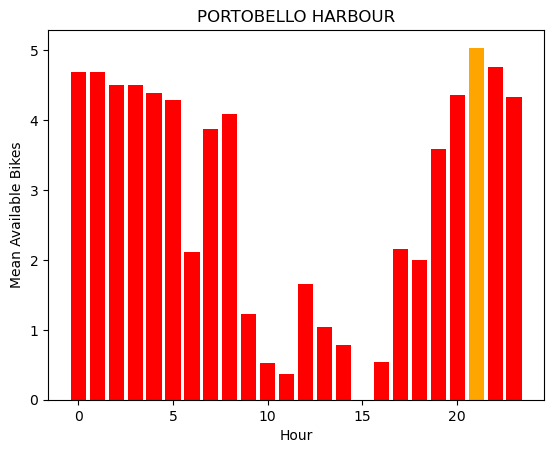

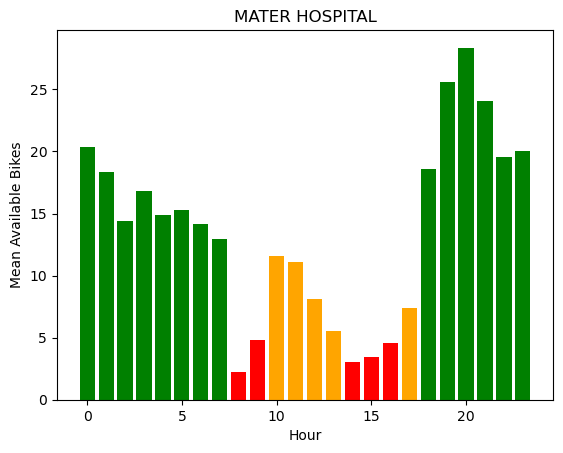

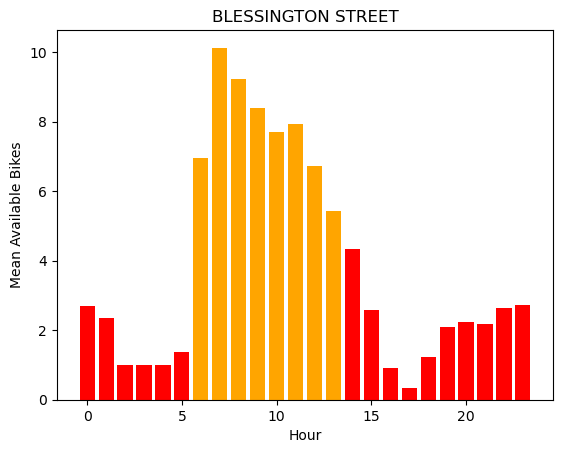

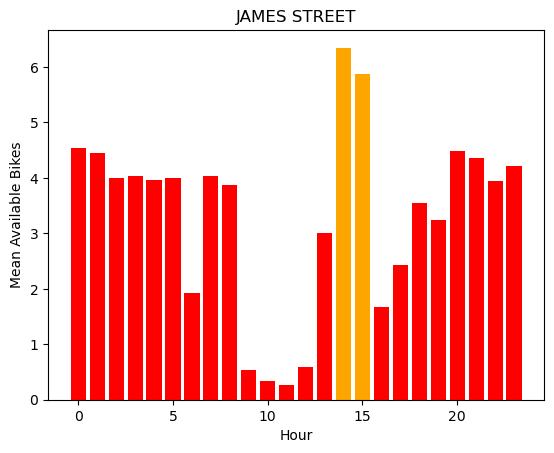

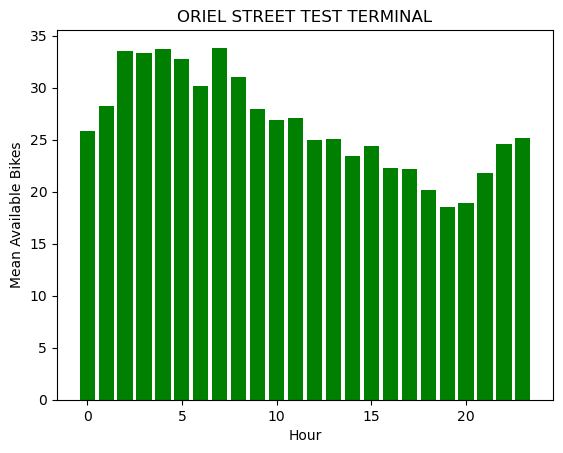

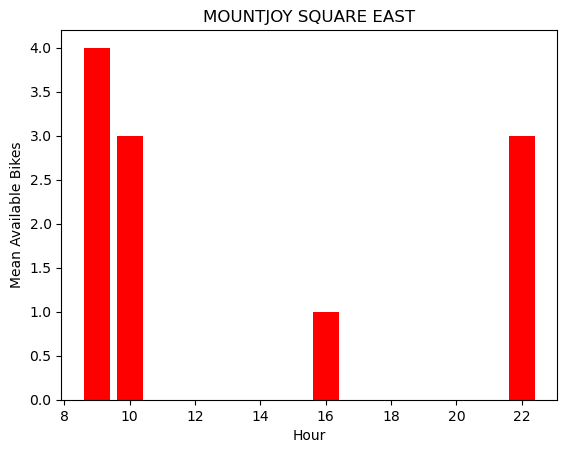

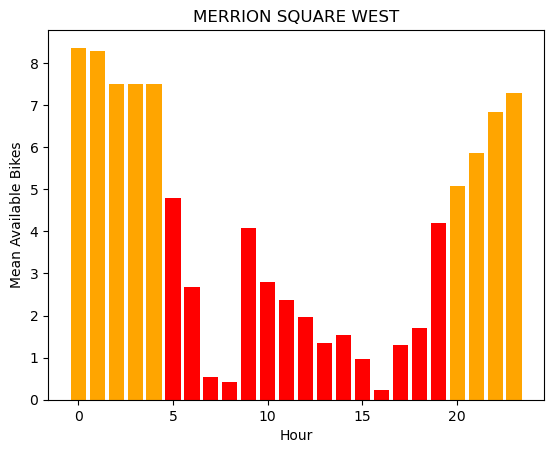

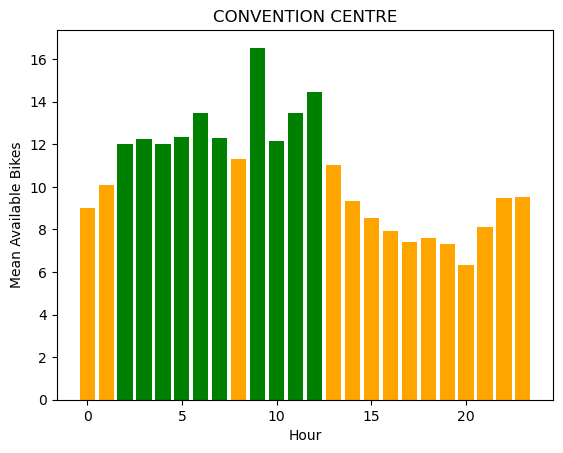

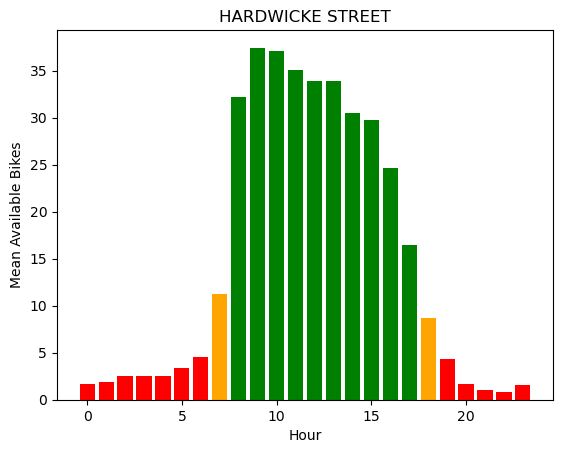

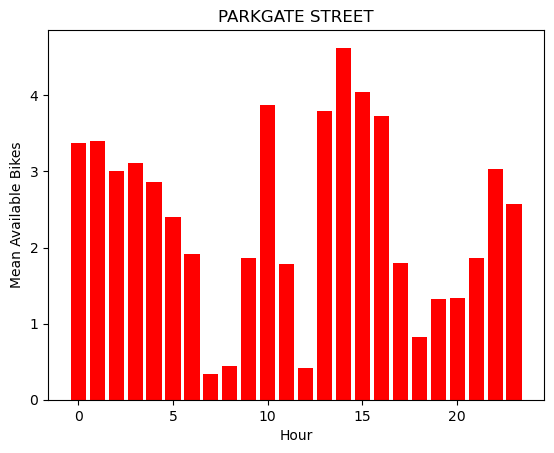

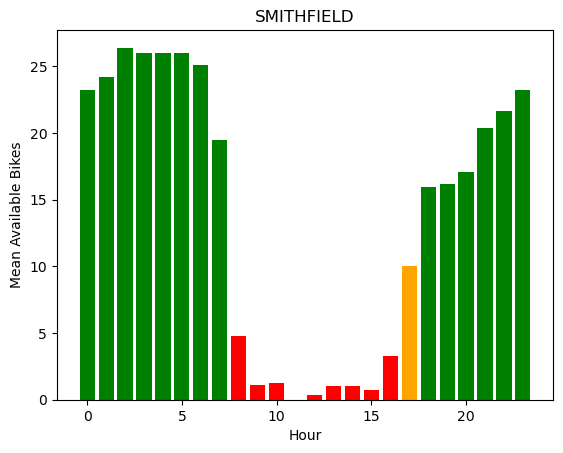

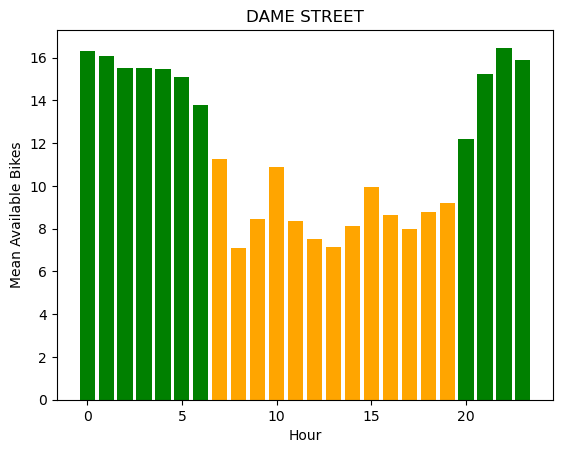

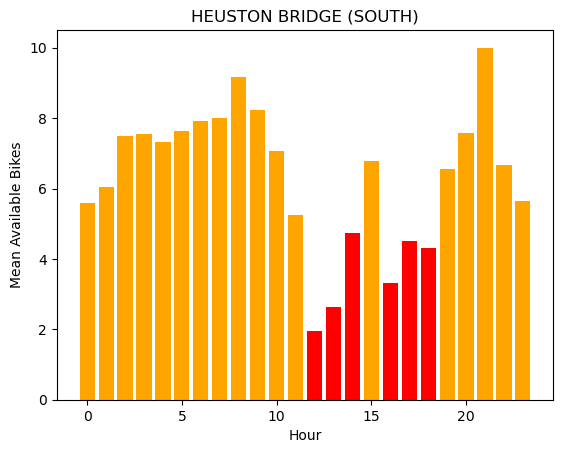

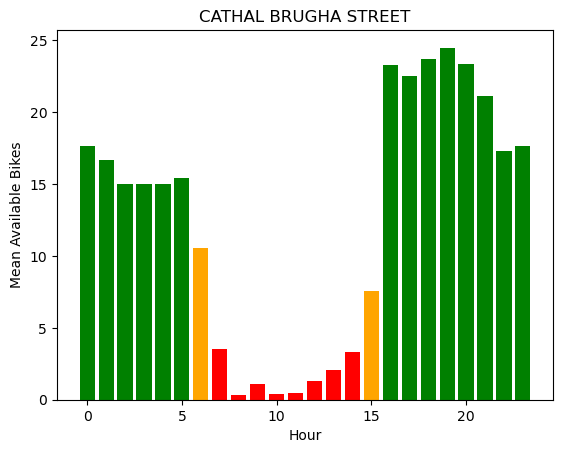

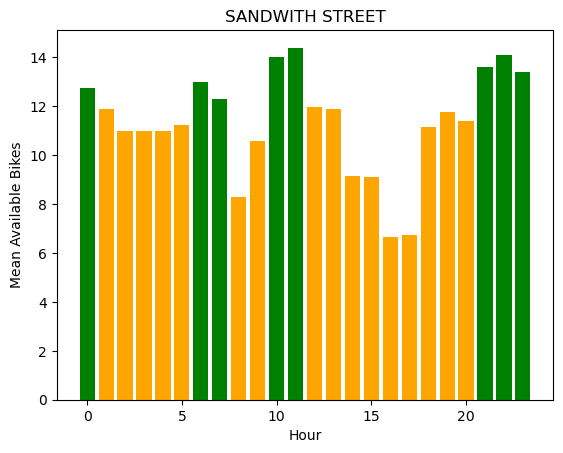

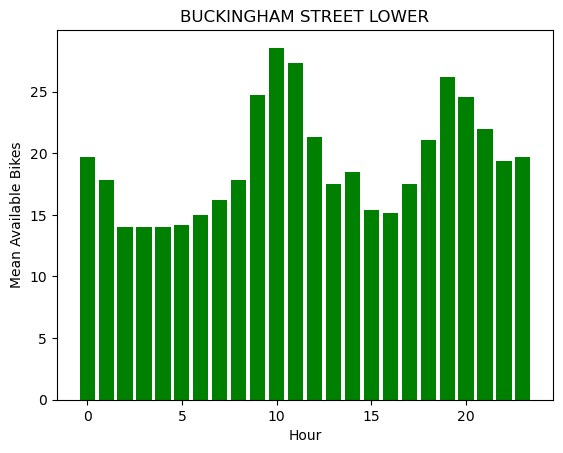

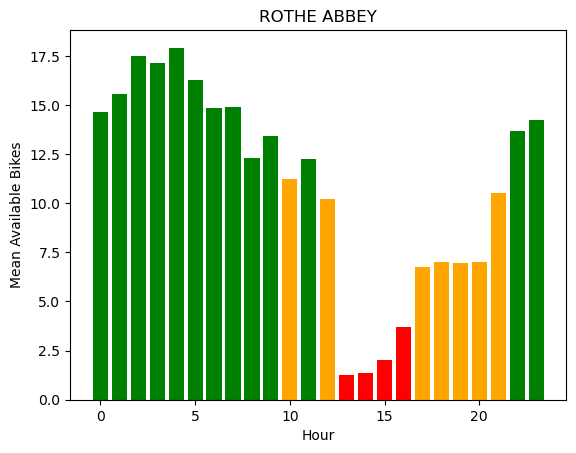

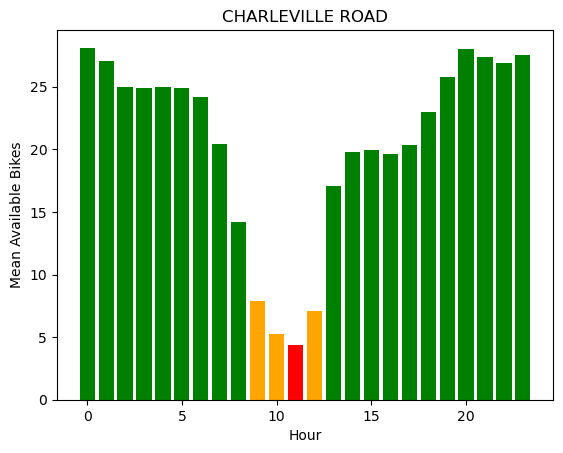

FileNotFoundError: [Errno 2] No such file or directory: "/Users/anita/Downloads/software-engineer-project-Anil-additions-2/static/plots/PRINCES STREET / O'CONNELL STREET.png"

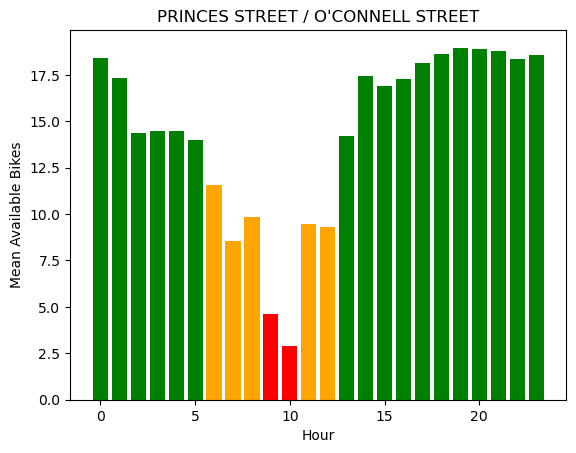

In [17]:
# plot the hour column on the x-axis and availableBikes column on the y-axis
#plt.plot(dfu['hour'], dfu['availableBikes'])
#plt.xlabel('Hour')
#plt.ylabel('Available Bikes')
#plt.show()


#line to specify the directory where you want to save the image files:

img_dir = '/Users/anita/Downloads/software-engineer-project-Anil-additions-2/static/plots'
os.makedirs(img_dir, exist_ok=True)

#storing the data to save as json
plotData ={}

# iterate over the station names and create a separate plot for each station
for i in station_names:
    # filter the DataFrame to only include data for this station
    station_df = dfu[dfu['nameStation'] == i]

    # group the data by the hour column and take the mean of the availableBikes column for each hour
    hour_groups = station_df.groupby('hour')
    mean_bikes = hour_groups['availableBikes'].mean()

    # plot the mean available bikes for each hour as a bar chart
    # define the colors based on the values
    colors = ['red' if value < 5 else 'orange' if value < 12 else 'green' for value in mean_bikes.values]

    # plot the mean available bikes for each hour as a bar chart with the assigned colors
    plt.bar(mean_bikes.index, mean_bikes.values, color=colors)
    
    plt.xlabel('Hour')
    plt.ylabel('Mean Available Bikes')
    plt.title(i)
    
    # save the plot as a file with the name of the station
    plt.savefig(os.path.join(img_dir, f"{i}.png"))
    
    #If you save after showing, it saves an empty plot...
    plt.show()
    
    # close the figure to prevent it from being reused for the next iteration
    plt.close()
    
    #store the mean_bikes data in the data dictionary
    plotData[i] = mean_bikes.to_dict()


In [16]:
from google.visualization import DataTable

# save the data as a JSON file
with open(os.path.join(img_dir, 'plot_data.json'), 'w') as f:
    f.write(pd.DataFrame.from_dict(plotData).to_json(orient='columns'))

# load the data into a DataTable object
with open(os.path.join(img_dir, 'plot_data.json'), 'r') as f:
    json_data = f.read()
    data_table = DataTable.from_json(json_data)

print(data_table.to_html())  # print the HTML representation of the DataTable

    


ModuleNotFoundError: No module named 'google'

In [ ]:
# Create a line plot with the hour of the day on the x-axis and the predicted number of bikes on the y-axis
plt.plot(hourly_availability.columns, hourly_availability.loc[day_of_week], '-o')

# Set the title and axis labels
plt.title("Predicted Number of Bikes Available for Today")
plt.xlabel("Hour of the Day")
plt.ylabel("Predicted Number of Bikes")

# Set the y-axis limits
plt.ylim(0, 30)

# Show the plot
plt.show()